In [1]:
%run ../../functions/vectorize_functions.py

In [9]:
import pandas as pd
import numpy as np
from pathlib import Path
import os
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.naive_bayes import MultinomialNB 
from sklearn.naive_bayes import GaussianNB 
from sklearn.naive_bayes import ComplementNB 

In [2]:
filepath_name = (('../../../data/twitter_hate-speech/train_cleaned.csv'))
df_cleaned = pd.read_csv(filepath_name, encoding='utf-8')


In [3]:
df_cleaned.head()

,id,label,tweet,tweet_cleaned,user_handle,hashtags,emojis
0,8886,0,@user #cinemaaawards final rehearsals!! geari...,final rehearsal gear evening butterfly stage h...,1,"['#cinemaaawards', '#butterflies', '#stage']",NaN
1,909,0,istg this is the best cheese ta but dayum expe...,good cheese ta expensive,0,[],NaN
2,27613,0,this was amazing. the weather was not. #musica...,amazing weather musical london weekend,0,"['#musical', '#london', '#matilda', '#westend'...",NaN
3,15999,0,yes! #talented #sexy ‘criminal minds’ casts ...,yes talented sexy ' criminal mind ' cast serie...,2,"['#talented', '#sexy']",NaN
4,23817,0,want to be while being #successful? see how ...,want successful see help,2,"['#successful', '#worklifebalance']",NaN


### TF-IDF

In [4]:
X_train_tfidf, X_test_tfidf, y_train, y_test = vectorize_tfidf(df=df_cleaned, text_column='tweet_cleaned', 
                                                                                 label_column="label")

print("Trainingsdaten (TF-IDF-Matrix):")
print(X_train_tfidf.toarray())


Trainingsdaten (TF-IDF-Matrix):
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


### Word2Vec

In [5]:
X_train_w2v, X_test_w2v, y_train, y_test = vectorize_w2v(df=df_cleaned, text_column ="tweet_cleaned", label_column="label")

print("Erste Trainingsvektoren:")
print(X_train_w2v[:5])

Erste Trainingsvektoren:
[[-0.19718729  0.35877065  0.14583091 ... -0.04322104  0.11348659
   0.15231087]
 [-0.20010734  0.19574016  0.22125328 ...  0.17330205  0.35643841
   0.40911799]
 [ 0.13739521  0.84337798 -0.21780659 ...  0.32223826  0.52025043
  -0.77267328]
 [-0.19887821  0.27981241 -0.30060491 ... -0.11563527  0.20634698
  -0.15080688]
 [-0.16232178  0.24463307 -0.17919528 ... -0.07066992  0.2402999
  -0.3303044 ]]


### Glove

In [6]:
X_train_glv, X_test_glv, y_train_glv, y_test_glv = vectorize_glove(df=df_cleaned, text_column='tweet_cleaned', 
                                                                                 label_column="label")

print("Erste Trainingsvektoren:")
print(X_train_glv[:5])


Erste Trainingsvektoren:
[[ 4.96233324e-01  2.39270002e-01  3.10583343e-01  8.73586622e-02
  -5.20296658e-01  4.55033357e-02  9.04513339e-01 -1.28933390e-02
   1.34757333e-01  4.00849998e-01 -2.23910014e-01 -9.14580027e-02
  -3.83656653e+00  2.71206662e-01  6.82033300e-02 -1.25649005e-01
  -1.45826648e-01 -4.93940006e-01  1.16323337e-01 -1.36062997e-01
   5.66450000e-01  6.91259975e-02 -1.11605665e-01 -6.54419971e-02
  -4.15433298e-02 -8.74900122e-02 -1.10016659e-01 -7.56633381e-02
   2.93169335e-01 -3.77460003e-01 -4.32433387e-02 -4.99666780e-02
  -1.89398339e-01  2.70376670e-01 -1.70396666e-01  4.65779995e-01
   4.77396667e-01  2.09736992e-01  2.81918656e-01 -1.00168671e-01
  -4.95240005e-01 -1.12940336e-01 -8.58999292e-03  3.82023325e-01
   2.38056670e-01 -1.26898963e-01  3.14650008e-02  1.19466583e-02
  -2.50260000e-01  2.13393341e-01  1.16738002e-01  3.35949997e-01
  -1.70619662e-01 -1.86343332e-01  5.15019993e-01 -3.45340014e-01
  -1.14110671e-01  5.61430017e-02  1.65286670e-01 -

### Vergleiche Methoden Logistic Regression

In [7]:
def compare_vectorization_methods_log(df, text_column, label_column):
    """
    Compares vectorizing methods TF-IDF, Word2Vec and Glove.
    """
    results = []

    # 1. TF-IDF
    print("Vektorisierung: TF-IDF")
    X_train_tfidf, X_test_tfidf, y_train, y_test = vectorize_tfidf(df, text_column, label_column)
    clf = LogisticRegression(max_iter=1000)
    clf.fit(X_train_tfidf, y_train)
    y_pred_tfidf = clf.predict(X_test_tfidf)
    results.append({
        "Method": "TF-IDF",
        "Accuracy": accuracy_score(y_test, y_pred_tfidf),
        "Precision": precision_score(y_test, y_pred_tfidf, average="weighted"),
        "Recall": recall_score(y_test, y_pred_tfidf, average="weighted"),
        "F1 Score": f1_score(y_test, y_pred_tfidf, average="weighted")
    })

    # 2. Word2Vec
    print("Vektorisierung: Word2Vec")
    X_train_w2v, X_test_w2v, y_train, y_test = vectorize_w2v(df, text_column, label_column)
    clf.fit(X_train_w2v, y_train)
    y_pred_w2v = clf.predict(X_test_w2v)
    results.append({
        "Method": "Word2Vec",
        "Accuracy": accuracy_score(y_test, y_pred_w2v),
        "Precision": precision_score(y_test, y_pred_w2v, average="weighted"),
        "Recall": recall_score(y_test, y_pred_w2v, average="weighted"),
        "F1 Score": f1_score(y_test, y_pred_w2v, average="weighted")
    })

    # 3. Glove
    print("Vektorisierung: Glove")
    X_train_glv, X_test_glv, y_train, y_test = vectorize_glove(df, text_column, label_column)
    clf.fit(X_train_glv, y_train)
    y_pred_glv = clf.predict(X_test_glv)
    results.append({
        "Method": "Glove",
        "Accuracy": accuracy_score(y_test, y_pred_glv),
        "Precision": precision_score(y_test, y_pred_glv, average="weighted"),
        "Recall": recall_score(y_test, y_pred_glv, average="weighted"),
        "F1 Score": f1_score(y_test, y_pred_glv, average="weighted")
    })

    results_df = pd.DataFrame(results)
    return results_df

In [10]:
results_log = compare_vectorization_methods_log(df=df_cleaned, text_column="tweet_cleaned", label_column="label")

Vektorisierung: TF-IDF
Vektorisierung: Word2Vec
Vektorisierung: Glove


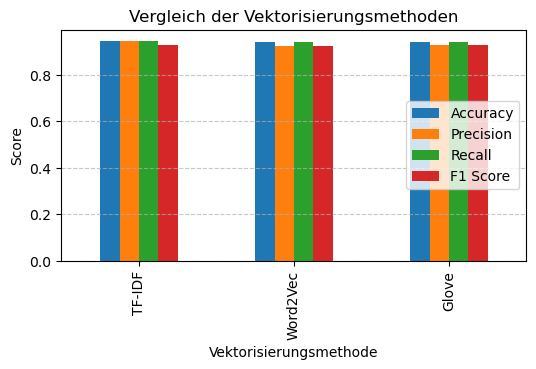

     Method  Accuracy  Precision    Recall  F1 Score
0    TF-IDF  0.946841   0.945942  0.946841  0.929454
1  Word2Vec  0.939878   0.924121  0.939878  0.924918
2     Glove  0.941746   0.928342  0.941746  0.929329


In [11]:
results_log.plot(x="Method", y=["Accuracy", "Precision", "Recall", "F1 Score"], kind="bar", figsize=(6, 3))
plt.title("Vergleich der Vektorisierungsmethoden")
plt.ylabel("Score")
plt.xlabel("Vektorisierungsmethode")
plt.legend(loc="right")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()
print(results_log)

### Vergleiche Methoden NB

In [12]:
def compare_vectorization_methods_gauss(df, text_column, label_column):
    """
    Compares vectorizing methods TF-IDF, Word2Vec and Glove.
    """
    results = []

    # 1. TF-IDF
    print("Vektorisierung: TF-IDF")
    X_train_tfidf, X_test_tfidf, y_train, y_test = vectorize_tfidf(df, text_column, label_column)
    clfcnb = ComplementNB()
    clfcnb.fit(X_train_tfidf, y_train)
    y_pred_tfidf = clfcnb.predict(X_test_tfidf)
    results.append({
        "Method": "TF-IDF",
        "Accuracy": accuracy_score(y_test, y_pred_tfidf),
        "Precision": precision_score(y_test, y_pred_tfidf, average="weighted"),
        "Recall": recall_score(y_test, y_pred_tfidf, average="weighted"),
        "F1 Score": f1_score(y_test, y_pred_tfidf, average="weighted")
    })

    # 2. Word2Vec
    print("Vektorisierung: Word2Vec")
    X_train_w2v, X_test_w2v, y_train, y_test = vectorize_w2v(df, text_column, label_column)
    clfgnb = GaussianNB()
    clfgnb.fit(X_train_w2v, y_train)
    y_pred_w2v = clfgnb.predict(X_test_w2v)
    results.append({
        "Method": "Word2Vec",
        "Accuracy": accuracy_score(y_test, y_pred_w2v),
        "Precision": precision_score(y_test, y_pred_w2v, average="weighted"),
        "Recall": recall_score(y_test, y_pred_w2v, average="weighted"),
        "F1 Score": f1_score(y_test, y_pred_w2v, average="weighted")
    })

    # 3. Glove
    print("Vektorisierung: Glove")
    X_train_glv, X_test_glv, y_train, y_test = vectorize_glove(df, text_column, label_column)
    clfgnb.fit(X_train_glv, y_train)
    y_pred_glv = clfgnb.predict(X_test_glv)
    results.append({
        "Method": "Glove",
        "Accuracy": accuracy_score(y_test, y_pred_glv),
        "Precision": precision_score(y_test, y_pred_glv, average="weighted"),
        "Recall": recall_score(y_test, y_pred_glv, average="weighted"),
        "F1 Score": f1_score(y_test, y_pred_glv, average="weighted")
    })

    results_df = pd.DataFrame(results)
    return results_df

In [13]:
results_gauss = compare_vectorization_methods_gauss(df=df_cleaned, text_column="tweet_cleaned", label_column="label")

Vektorisierung: TF-IDF
Vektorisierung: Word2Vec
Vektorisierung: Glove


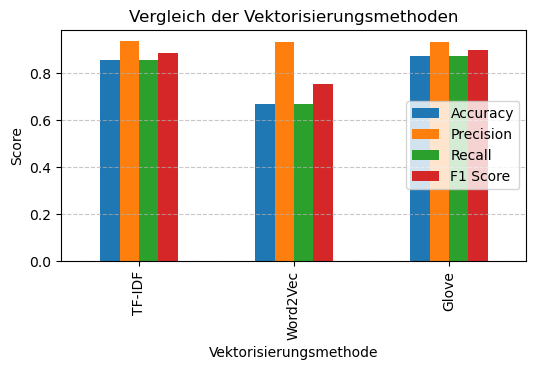

     Method  Accuracy  Precision    Recall  F1 Score
0    TF-IDF  0.856658   0.938193  0.856658  0.886077
1  Word2Vec  0.666950   0.932333  0.666950  0.751940
2     Glove  0.873811   0.933702  0.873811  0.896448


In [14]:
results_gauss.plot(x="Method", y=["Accuracy", "Precision", "Recall", "F1 Score"], kind="bar", figsize=(6, 3))
plt.title("Vergleich der Vektorisierungsmethoden")
plt.ylabel("Score")
plt.xlabel("Vektorisierungsmethode")
plt.legend(loc="right")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()
print(results_gauss)